In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['xtick.labelsize'] = 20.
plt.rcParams['ytick.labelsize'] = 20.
plt.rcParams['axes.labelsize'] = 25.
plt.rcParams['legend.fontsize'] = 25.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


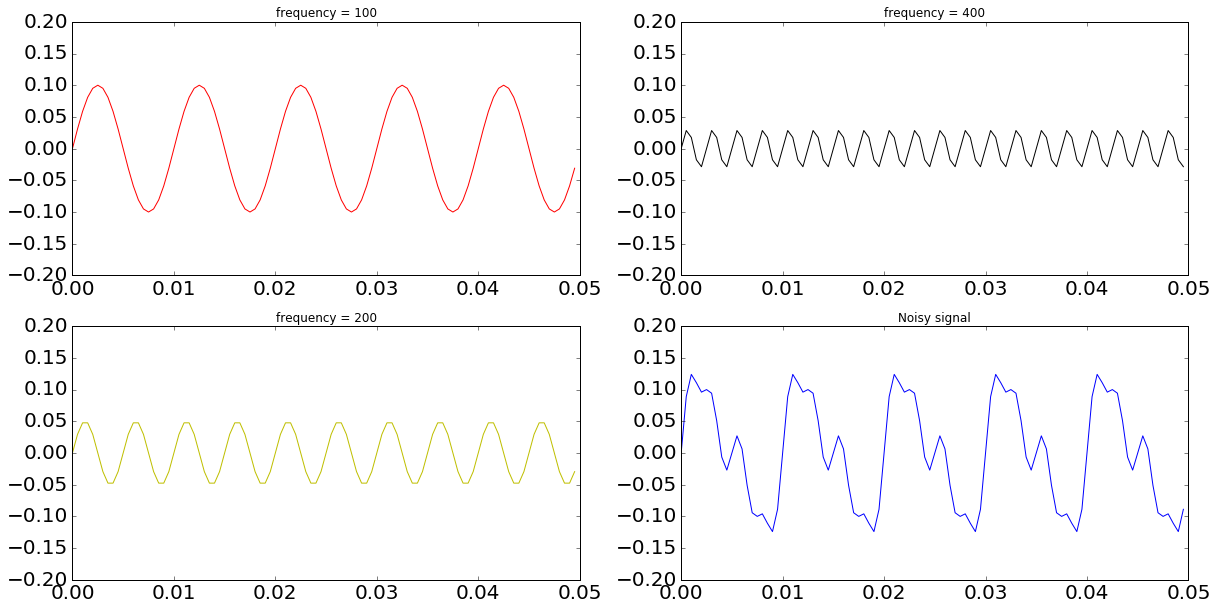

In [189]:
T = 0.05
fs = 2000
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)
a1 = 0.1
a2 = 0.03
a3 = 0.05
f1 = 100
f2 = 400
f3 = 200

x = a1*np.sin(2.*np.pi*f1*t)
x += a2*np.sin(2.*np.pi*f2*t)
x += a3*np.sin(2.*np.pi*f3*t)
#### plotting signal ####
fig = plt.figure(1)
ax = fig.add_subplot(2,2,1)
ax.set_title("frequency = %d"%f1)
ax.set_ylim(-0.2,0.2)
ax.plot(t,a1*np.sin(2.*np.pi*f1*t),'r')
####################################
ax = fig.add_subplot(2,2,2)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f2)
plt.plot(t,a2*np.sin(2.*np.pi*f2*t),'k')
####################################
ax = fig.add_subplot(2,2,3)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f3)
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'y')
####################################
ax = fig.add_subplot(2,2,4)
ax.set_ylim(-0.2,0.2)
ax.set_title("Noisy signal")
plt.plot(t, x)
plt.show()

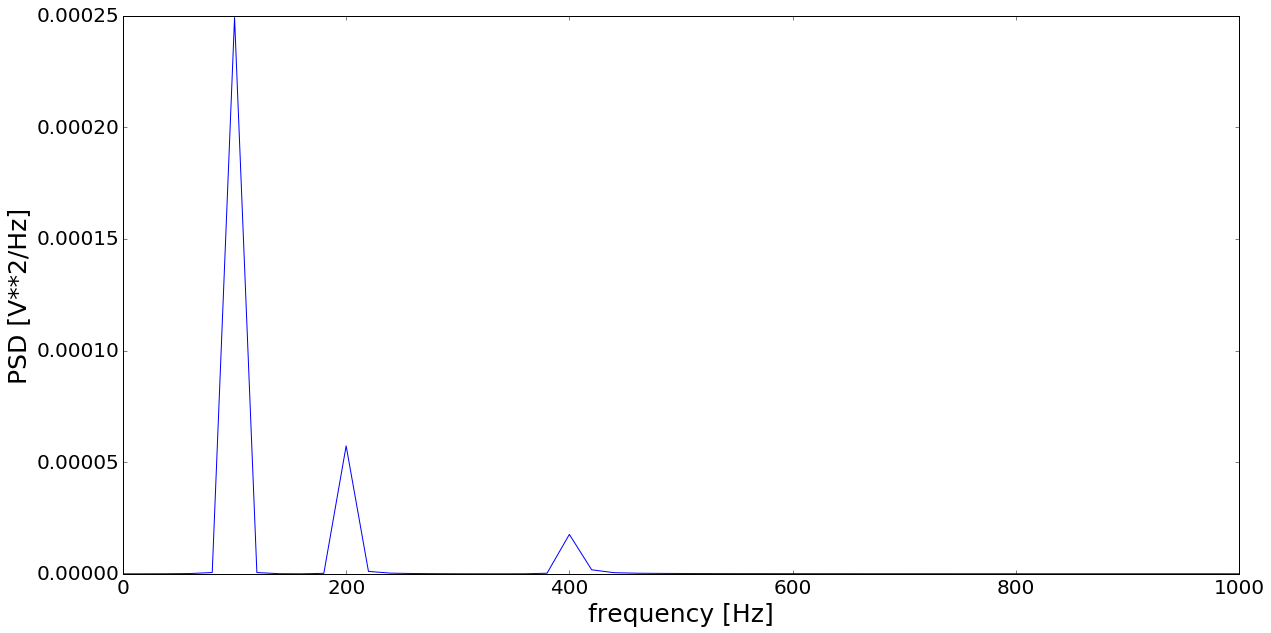

In [145]:
f, Pxx_den = signal.periodogram(x, fs)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

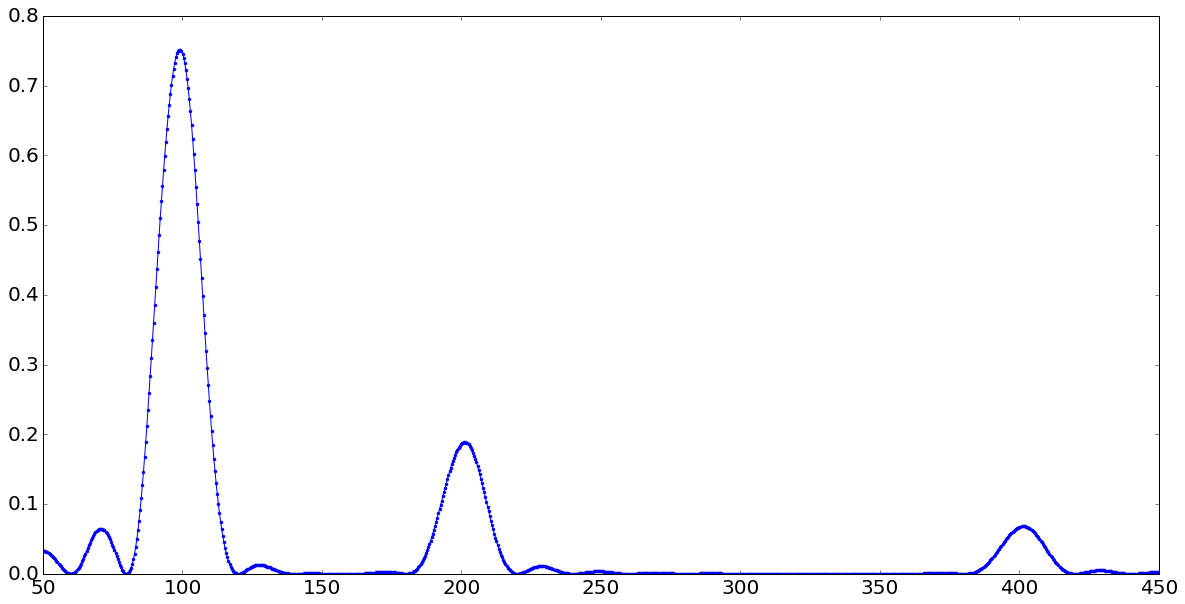

In [194]:
## period => [0.05 , 50] microsecs
frequencies = np.linspace(50,450,1000)*(2.*np.pi)
pgram = signal.lombscargle(t,x, frequencies,normalize=True)
# Plotting the Frequency Power Spectrum
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(frequencies/(2.*np.pi),pgram, 'b.-')
#ax1.axvline(0.03,c='k',lw=2.)
plt.show()
#plt.xlim(0,2500)

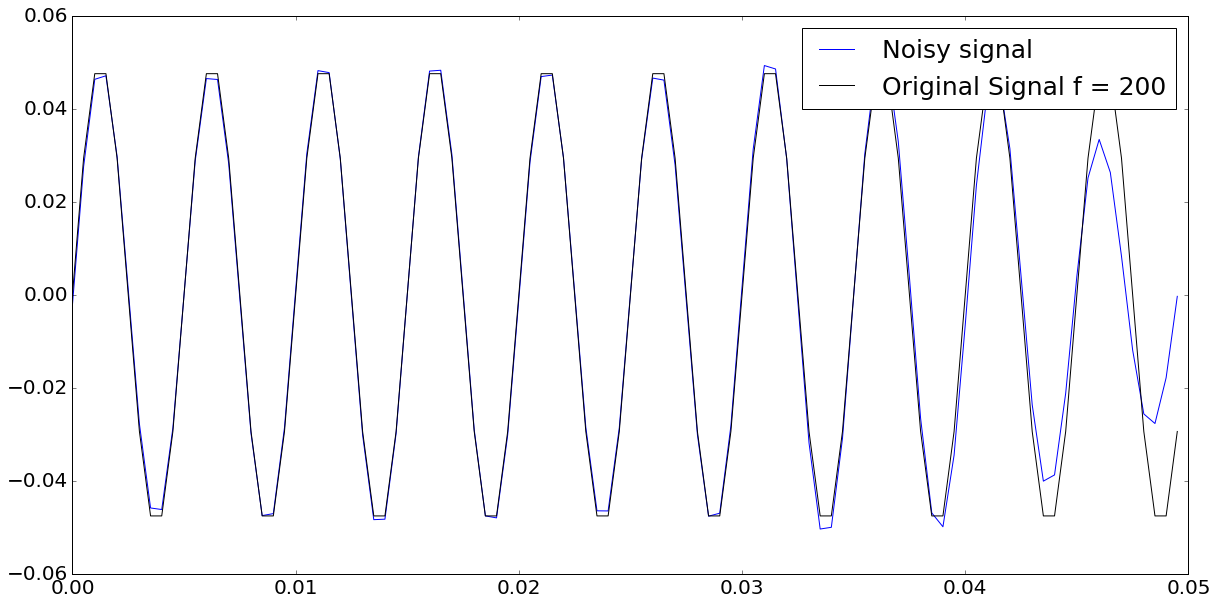

In [193]:
# First, design the Buterworth filter
N  = 5  # Filter order
Nf = fs*0.5 #Nyquist frequency
lowF = 150# Low Cutoff frequency
HighF = 300# High Cutoff
B, A = signal.butter(N, [lowF/Nf,HighF/Nf], btype='band',output='ba')
#B, A = signal.butter(N, HighF/Nf,output='ba')

# Second, apply the filter
tempf = signal.filtfilt(B,A, x)
plt.figure(2)
plt.clf()
plt.plot(t,tempf, label='Noisy signal')
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'k',label="Original Signal f = %d"%f3)
plt.legend(loc="best")
plt.show()

In [109]:
Nf = fs*0.5

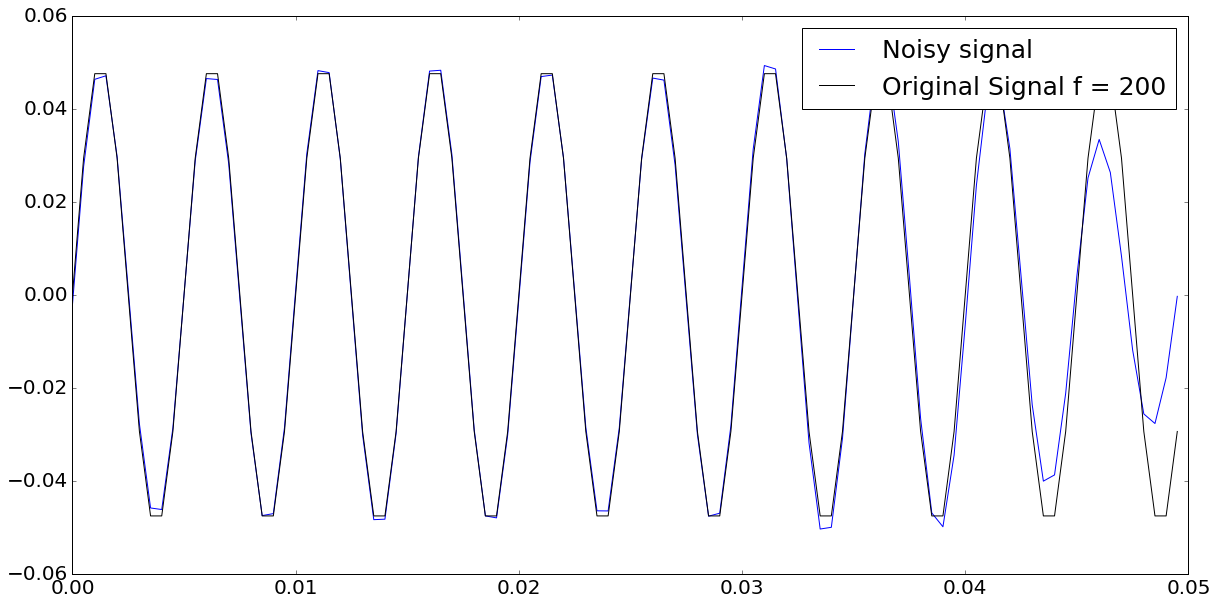

In [120]:
# First, design the Buterworth filter
N  = 5  # Filter order
Nf = fs*0.5
lowF = 150# Low Cutoff frequency
HighF = 300# High Cutoff
B, A = signal.butter(N, [lowF/Nf,HighF/Nf], btype='band',output='ba')

# Second, apply the filter
tempf = signal.filtfilt(B,A, x)
plt.figure(2)
plt.clf()
plt.plot(t,tempf, label='Noisy signal')
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'k',label="Original Signal f = %d"%f3)
plt.legend(loc="best")
plt.show()

# ------------------------------------------------------------------------------------------

# with Noise 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


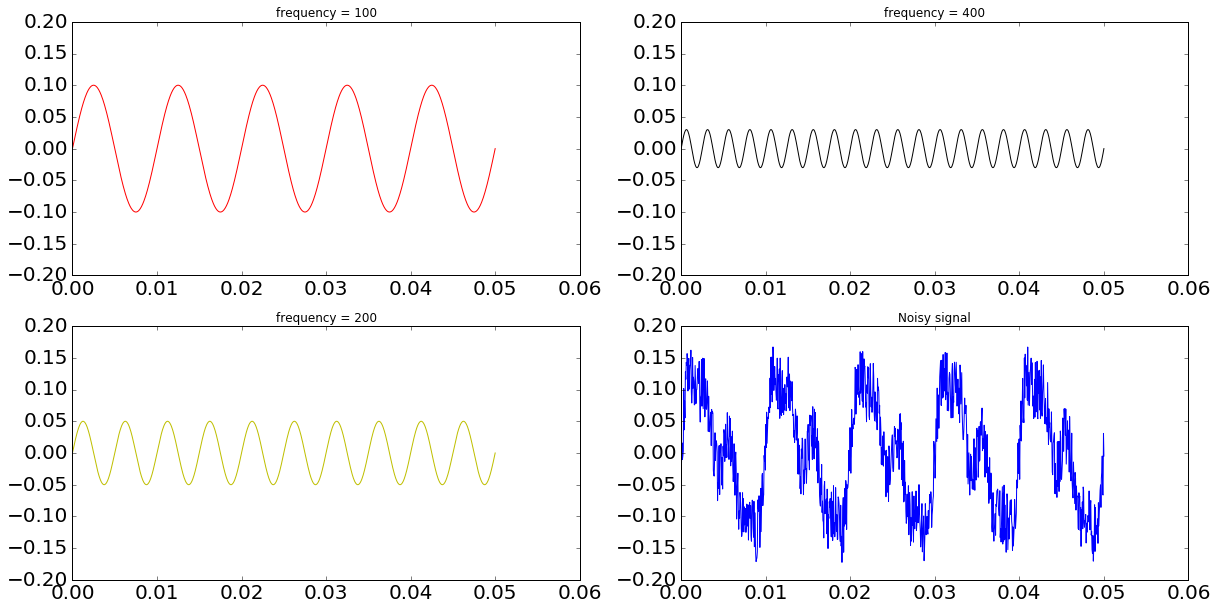

In [195]:
import numpy as np
T = 0.05
fs = 20000
nsamples = T * fs
t = np.linspace(0, T, nsamples)
a1 = 0.1
a2 = 0.03
a3 = 0.05
an = 0.1
f1 = 100
f2 = 400
f3 = 200

xn = a1*np.sin(2.*np.pi*f1*t)
xn += a2*np.sin(2.*np.pi*f2*t)
xn += a3*np.sin(2.*np.pi*f3*t)
xn += an*np.array([np.random.rand() - 0.5 for _ in range(int(nsamples))])
#### plotting signal ####
fig = plt.figure(1)
ax = fig.add_subplot(2,2,1)
ax.set_title("frequency = %d"%f1)
ax.set_ylim(-0.2,0.2)
ax.plot(t,a1*np.sin(2.*np.pi*f1*t),'r')
####################################
ax = fig.add_subplot(2,2,2)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f2)
plt.plot(t,a2*np.sin(2.*np.pi*f2*t),'k')
####################################
ax = fig.add_subplot(2,2,3)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f3)
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'y')
####################################
ax = fig.add_subplot(2,2,4)
ax.set_ylim(-0.2,0.2)
ax.set_title("Noisy signal")
plt.plot(t, xn)
plt.show()

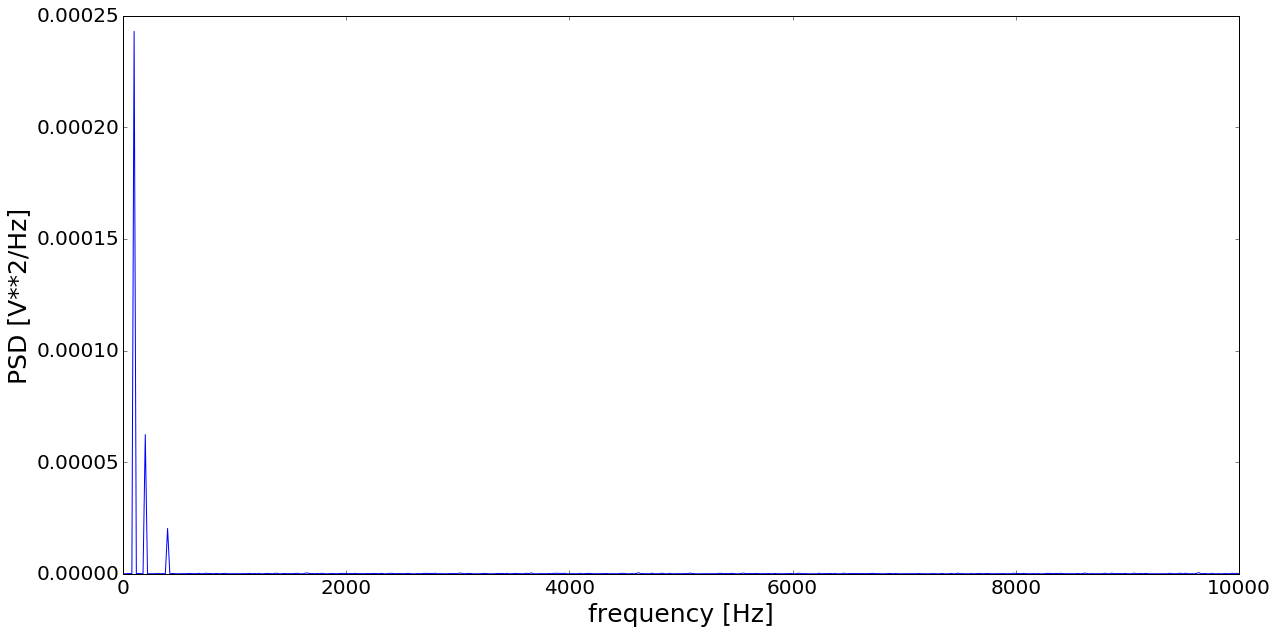

In [196]:
f, Pxx_den = signal.periodogram(xn, fs)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

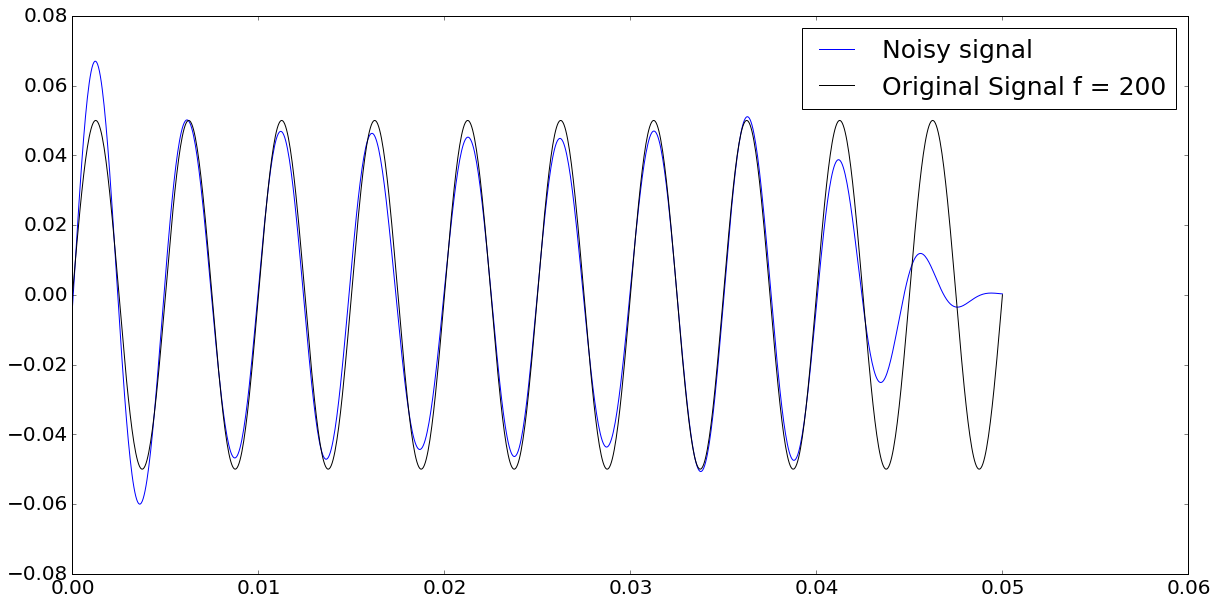

In [197]:
# First, design the Buterworth filter
N  = 5  # Filter order
Nf = fs*0.5 #Nyquist frequency
lowF = 150# Low Cutoff frequency
HighF = 300# High Cutoff
B, A = signal.butter(N, [lowF/Nf,HighF/Nf], btype='band',output='ba')
#B, A = signal.butter(N, HighF/Nf,output='ba')

# Second, apply the filter
tempf_noise = signal.filtfilt(B,A, xn)
plt.figure(2)
plt.clf()
plt.plot(t,tempf_noise, label='Noisy signal')
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'k',label="Original Signal f = %d"%f3)
plt.legend(loc="best")
plt.show()